In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Programming\ML_DATA\\Smoking Data.csv")

In [3]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


# Data Analysis 

In [4]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
# percentage calculate for smoker

no = (1064 / (1064+274)) * 100 
yes = (274 / (1064+274)) * 100

In [6]:
no
# 79.52167414050822 % for NO 

79.52167414050822

In [7]:
yes 
# 20.47832585949178 % for Yes 

20.47832585949178

In [8]:
# This data is an imbalanced dataset
# 79.52167414050822 % for NO 
# 20.47832585949178 % for Yes 

# Data visualization

In [9]:
import seaborn as sns

In [10]:
df.keys()

Index(['region', 'age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')

Text(0.5, 1.0, 'Countplot For Smoker')

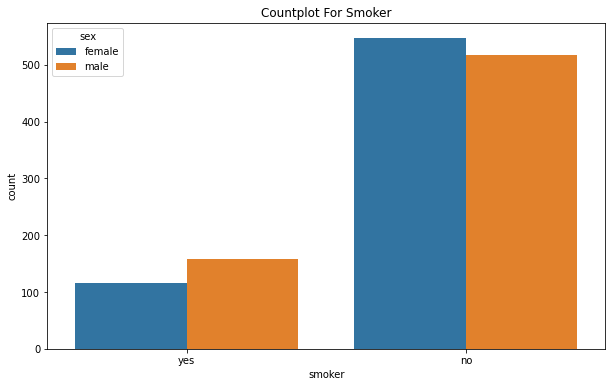

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='smoker',data=df, hue="sex") # This data is an imbalanced dataset
plt.title("Countplot For Smoker")

# Show count in Seaborn countplots

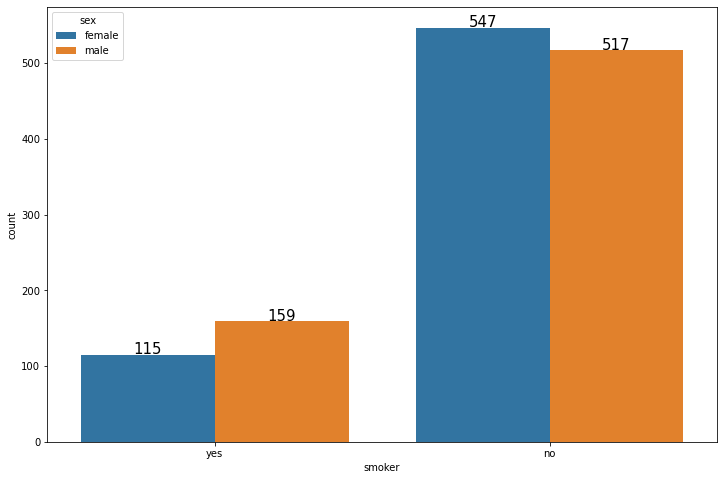

In [12]:
# I got the code in this blog https://www.dataforeverybody.com/countplot-seaborn-order-size-values/

plt.figure(figsize = (12,8)) 
clt =sns.countplot(x = 'smoker', data=df, hue='sex')
# show the value count for every bar

for rect in clt.patches:
    clt.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,
              rect.get_height(),horizontalalignment='center', fontsize = 15)
    

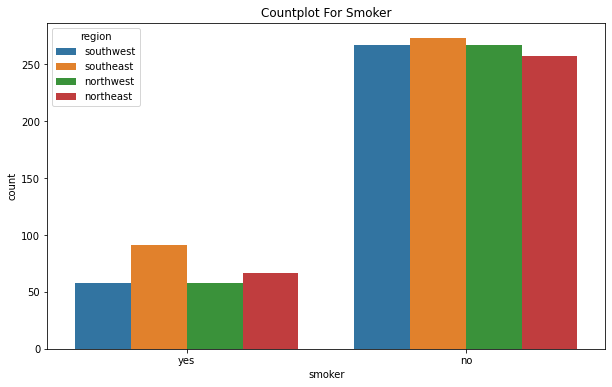

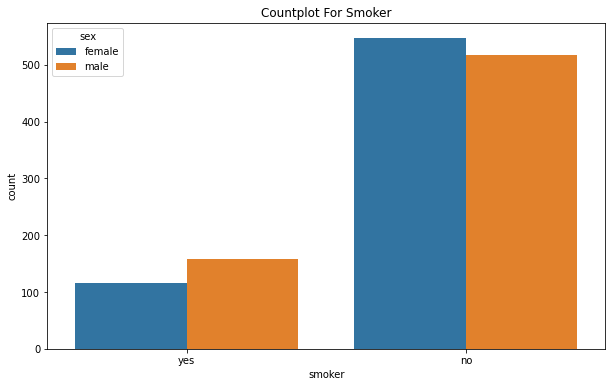

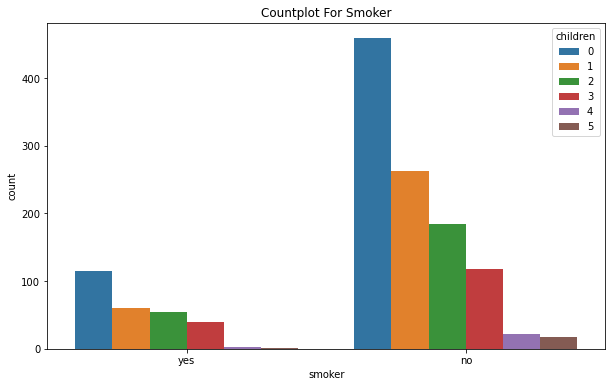

In [13]:
# This data is an imbalanced dataset

cols = ['region', 'sex','children'] 
for col in cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x='smoker',data=df, hue=col)
    plt.title("Countplot For Smoker")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


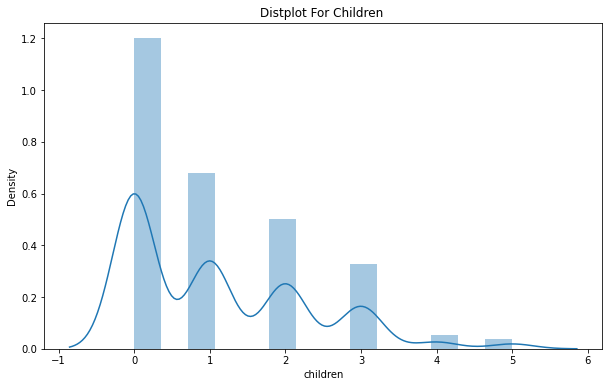

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df['children'])
plt.title("Distplot For Children ")
plt.show()

In [15]:
df.keys()

Index(['region', 'age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

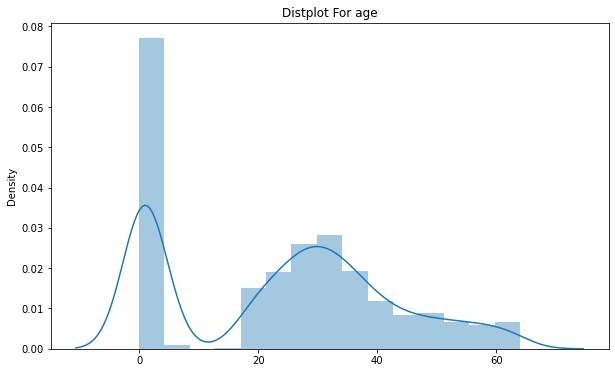

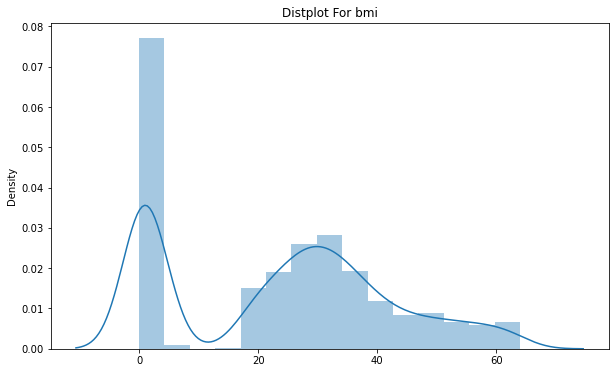

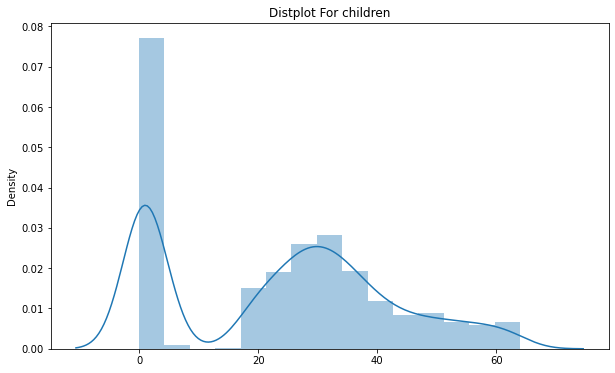

In [16]:
cols = ['age', 'bmi', 'children']

for col in cols:
    plt.figure(figsize=(10,6))
    sns.distplot(df[cols])
    plt.title("Distplot For " + col)
    
plt.show()

# Convert Categorical Data to Numerical Data

In [17]:
x = df.drop('smoker',axis=1)
y = df.smoker

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
# Encoding with For Loop
from pandas.core.dtypes.common import is_numeric_dtype
cols = ['region', 'age', 'sex', 'bmi', 'children']
for col in cols:
    if is_numeric_dtype(x[col]):
        continue
    else:
        x[col] = le.fit_transform(x[col])

In [20]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


# training test split for ML model 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=.70, random_state=51)

In [23]:
x_train.head()

,region,age,sex,bmi,children
938,2,18,1,26.18,2
1054,1,27,0,21.47,0
1057,2,45,0,31.79,0
792,0,22,0,23.18,0
438,2,52,0,46.75,5


In [24]:
y_train.head()

938     no
1054    no
1057    no
792     no
438     no
Name: smoker, dtype: object

# Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf = DecisionTreeClassifier()

In [27]:
clf.fit(x_train,y_train) # fitting the model 

DecisionTreeClassifier()

In [28]:
testing = clf.predict(x_test) # Testing the model 

In [29]:
testing # Predicted Result 

array(['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',

In [30]:
np.array(y_test) # actual Result

array(['no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no

In [31]:
clf.score(x_test,y_test)

0.6666666666666666

# Confusion Matrix

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [33]:
print(classification_report(y_test,testing))

              precision    recall  f1-score   support

          no       0.78      0.80      0.79       310
         yes       0.24      0.22      0.23        92

    accuracy                           0.67       402
   macro avg       0.51      0.51      0.51       402
weighted avg       0.65      0.67      0.66       402



In [34]:
con_mat = confusion_matrix(y_test,testing)
con_mat

array([[248,  62],
       [ 72,  20]], dtype=int64)

Text(51.0, 0.5, 'Actual Values')

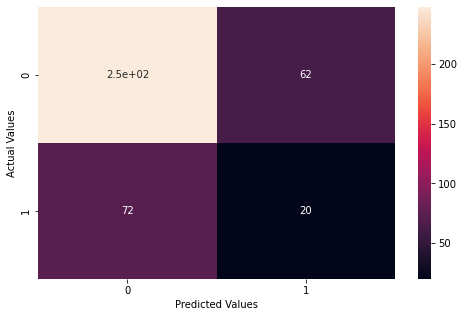

In [35]:
plt.figure(figsize=(8,5))
sns.heatmap(con_mat, annot=True)
plt.xlabel('Predicted Values',)
plt.ylabel('Actual Values')

In [36]:
tp,fn,fp,tn = con_mat.reshape(-1)

In [37]:
tp

248

In [38]:
fn

62

In [39]:
fp

72

In [40]:
tn

20

# Find Accuracy

In [41]:
# tp = 252 , fn = 69 , fp = 67 , tn = 14  
accuracy = (tp+tn) / (tp + fp + tn + fn)                 

In [42]:
accuracy

# accuracy is 0.6616915422885572 %

0.6666666666666666

# Precision or Positive Predictive Value ( PPV )

In [43]:
# tp = 252 , fp = 67 

ppv = tp/(tp+fp)
ppv
# PPV is 0.7899686520376176 % 

0.775

# Sensitivity , Recall , Hit Rate  , or True Positive Rate ( TTR )

In [44]:
# tp = 252 , fn = 69 , fp = 67 , tn = 14 
recall = tp / (tp+fn)
recall 
# recall is 0.7850467289719626 %  

0.8

# Sensitivity , Selectivity, or True Negative Rate ( TNR )

In [45]:
# tp = 252 , fn = 69 , fp = 67 , tn = 14 
selectivity = tn / (tn+fp)

In [46]:
selectivity
# Selectivity is 0.1728395061728395 % 

0.21739130434782608

# False Positive Rate ( FPR ) or 1- Specificity 

In [47]:
# tp = 252 , fn = 69 , fp = 67 , tn = 14 
fpr = fp / (fp+tn)
fpr
# FPR = 0.8271604938271605 % 

0.782608695652174

# F1 Measure

In [48]:
# recall is 0.7850467289719626 % 

f1_measure = ( tp/(tp+fp) + recall ) / 2

In [49]:
f1_measure
# F1 Measure is 0.7875076905047901 %

0.7875000000000001

# Harmonic Mean, F1 Score 

In [50]:
precision = tp/(tp+fp)
recall = tp / (tp+fn)

f1 = (2 * precision) / (precision + recall )

In [51]:
f1
# harmonic mean and F1 Score is 1.003125 %

0.9841269841269841

# Threat Score(TS) or Critical Success Index(CSI) 

In [52]:
CSI = tp / (tp+fn+fp)
CSI

# Critical Success Index is 0.6494845360824743 %


0.6492146596858639

# False Discovery Rate (FDR)

In [53]:
FDR = fp / (tp + fp )
FDR 
# RDR is 0.21003134796238246

0.225

# ROC & AUC Curve 

<Figure size 864x576 with 0 Axes>

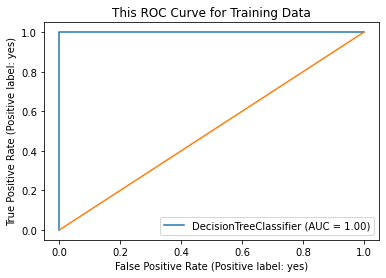

In [54]:
plt.figure(figsize=(12,8))
plot_roc_curve(clf,x_train,y_train)
plt.plot([0,1],[0,1])
plt.title("This ROC Curve for Training Data")
plt.show()

<Figure size 864x576 with 0 Axes>

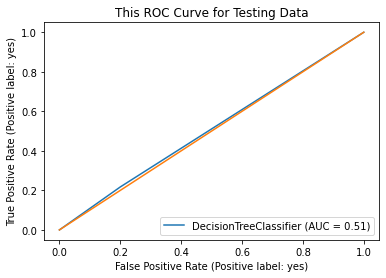

In [57]:
plt.figure(figsize=(12,8))
plot_roc_curve(clf,x_test,y_test)
plt.plot([0,1],[0,1])
plt.title("This ROC Curve for Testing Data")
plt.show()

# 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.1 is consideredoutstanding

# Balanced Accurancy (BA)

In [62]:
# BA = (TPR + TNR) / 2 

TPR = tp / (tp+fn) # TPR means True Positive Rate
TNR = tn / (fp+tn) # TPR means True Negative Rate


BA = (TPR + TNR) / 2  # Balanced Accurancy 

# Balanced Accurancy is 0.5086956521739131 % 

In [61]:
BA

0.5086956521739131